In [1]:
library("dplyr")
library("rcompanion")
library("car")
library("IDPmisc")


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Warning message:
"package 'rcompanion' was built under R version 4.1.3"
Warning message:
"package 'car' was built under R version 4.1.3"
Loading required package: carData

Warning message:
"package 'carData' was built under R version 4.1.3"

Attaching package: 'car'


The following object is masked from 'package:dplyr':

    recode


Warning message:
"package 'IDPmisc' was built under R version 4.1.3"


In [2]:
Netflix = read.csv("netflix_recode.csv")

In [3]:
Netflix

X,id,title,type,description,release_year,age_certification,runtime,production_countries,seasons,...,thriller,crime,comedy,documentation,fantasy,scifi,romance,horror,history,music
<int>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<chr>,<dbl>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
0,ts300399,Five Came Back: The Reference Films,SHOW,"This collection includes 12 World War II-era propaganda films â€” many of which are graphic and offensive â€” discussed in the docuseries ""Five Came Back.""",1945,TV-MA,51,['US'],1,...,0,0,0,1,0,0,0,0,0,0
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works as a night-time taxi driver in New York City where the perceived decadence and sleaze feed his urge for violent action.,1976,R,114,['US'],NA,...,0,1,0,0,0,0,0,0,0,0
2,tm154986,Deliverance,MOVIE,"Intent on seeing the Cahulawassee River before it's turned into one huge lake, outdoor fanatic Lewis Medlock takes his friends on a river-rafting trip they'll never forget into the dangerous American back-country.",1972,R,109,['US'],NA,...,1,0,0,0,0,0,0,0,0,0
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recruits his Knights of the Round Table, including Sir Bedevere the Wise, Sir Lancelot the Brave, Sir Robin the Not-Quite-So-Brave-As-Sir-Lancelot and Sir Galahad the Pure. On the way, Arthur battles the Black Knight who, despite having had all his limbs chopped off, insists he can still fight. They reach Camelot, but Arthur decides not to enter, as ""it is a silly place"".",1975,PG,91,['GB'],NA,...,0,0,1,0,1,0,0,0,0,0
4,tm120801,The Dirty Dozen,MOVIE,"12 American military prisoners in World War II are ordered to infiltrate a well-guarded enemy chÃ¢teau and kill the Nazi officers vacationing there. The soldiers, most of whom are facing death sentences for a variety of violent crimes, agree to the mission and the possible commuting of their sentences.",1967,,150,"['GB', 'US']",NA,...,0,0,0,0,0,0,0,0,0,0
5,ts22164,Monty Python's Flying Circus,SHOW,"A British sketch comedy series with the shows being composed of surreality, risquÃ© or innuendo-laden humour, sight gags and observational sketches without punchlines.",1969,TV-14,30,['GB'],4,...,0,0,1,0,0,0,0,0,0,0
6,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, but through a series of ridiculous events, he gains a reputation as the Messiah. When he's not dodging his followers or being scolded by his shrill mother, the hapless Brian has to contend with the pompous Pontius Pilate and acronym-obsessed members of a separatist movement. Rife with Monty Python's signature absurdity, the tale finds Brian's life paralleling Biblical lore, albeit with many more laughs.",1979,R,94,['GB'],NA,...,0,0,1,0,0,0,0,0,0,0
7,tm14873,Dirty Harry,MOVIE,"When a madman dubbed 'Scorpio' terrorizes San Francisco, hard-nosed cop, Harry Callahan â€“ famous for his take-no-prisoners approach to law enforcement â€“ is tasked with hunting down the psychopath. Harry eventually collars Scorpio in the process of rescuing a kidnap victim, only to see him walk on technicalities. Now, the maverick detective is determined to nail the maniac himself.",1971,R,102,['US'],NA,...,1,1,0,0,0,0,0,0,0,0
8,tm119281,Bonnie and Clyde,MOVIE,"In the 1930s, bored waitress Bonnie Parker falls in love with an ex-con named Clyde Barrow and together they start a violent crime spree through the country, stealing cars and robbing banks.",1967,R,110,['US'],NA,...,0,1,0,0,0,0,0,0,0,0


Questions: 

Does the release year relate to the IMDB score? The TMBD score? 
Hoe does genre relate to age certification? 
Is there a difference in IMDBScore among the genre categories of drama, comedy and romance?

# Question 1: Is there a difference in IMDBscore among the age certifications of TV-MA, TV-Y and TV-G?


# Data Wrangling

In [4]:
Netflix$age_certification

[1] "TV-MA" "R"     "R"     "PG"    ""      "TV-14" "R"     "R"     "R"    
  [10] "R"     ""      "PG-13" "R"     ""      ""      "PG"    "R"     ""     
  [19] ""      ""      ""      ""      ""      ""      ""      ""      "TV-MA"
  [28] ""      ""      ""      ""      ""      ""      ""      ""      "TV-PG"
  [37] "R"     "R"     "R"     "R"     "R"     "PG"    "R"     "R"     "TV-PG"
  [46] "TV-Y"  "TV-G"  "PG-13" "TV-G"  "PG-13" "PG-13" "R"     "R"     "TV-PG"
  [55] "R"     "TV-Y"  ""      ""      ""      "TV-Y"  "R"     ""      ""     
  [64] ""      "R"     ""      ""      ""      ""      ""      ""      ""     
  [73] ""      ""      ""      "R"     ""      ""      ""      ""      ""     
  [82] ""      ""      "TV-PG" ""      ""      ""      ""      ""      ""     
  [91] ""      "TV-PG" "PG-13" "TV-PG" "R"     "TV-Y7" "R"     "PG-13" "R"    
 [100] "R"     "TV-14" "TV-14" "PG-13" "TV-14" "R"     "PG-13" "PG-13" "TV-14"
 [109] "PG-13" "R"     "TV-14" "R"     "R"     "PG"    "TV-Y7" "PG-13" "R"    
 [118] "TV-Y"  "R"     "TV-Y"  "TV-PG" "TV-14" "PG"    "R"     "PG-13" "TV-G" 
 [127] "PG"    "PG-13" "R"     ""      "PG"    "R"     "PG"    "PG-13" "TV-G" 
 [136] "PG-13" "TV-Y7" "PG-13" "PG-13" "PG-13" "R"     "R"     "R"     "PG"   
 [145] "R"     "TV-G"  "R"     "TV-Y7" "PG-13" "TV-Y7" "R"     "TV-PG" "PG"   
 [154] "PG-13" "R"     "R"     "R"     "TV-PG" "TV-PG" "TV-PG" "TV-MA" "TV-Y7"
 [163] "G"     ""      "G"     "TV-MA" ""      "PG-13" "G"     "TV-MA" ""     
 [172] "R"     "R"     "PG-13" ""      ""      ""      "TV-MA" ""      ""     
 [181] ""      ""      ""      "G"     ""      ""      "G"     ""      ""     
 [190] "G"     "PG"    "PG-13" ""      ""      "PG-13" ""      ""      "PG"   
 [199] "NC-17" "PG-13" ""      ""      ""      ""      "PG-13" ""      ""     
 [208] ""      ""      ""      ""      ""      ""      ""      ""      ""     
 [217] "TV-MA" "TV-PG" "TV-MA" "TV-14" "R"     "PG-13" "TV-PG" "TV-14" "TV-MA"
 [226] "TV-PG" "PG-13" "TV-14" "TV-MA" "TV-PG" "TV-MA" "R"     "TV-14" "TV-Y7"
 [235] "PG-13" "TV-14" "TV-14" "PG-13" "TV-Y7" "R"     "TV-G"  "PG-13" "PG-13"
 [244] "TV-14" "TV-14" "TV-PG" "R"     ""      "TV-Y7" "R"     "TV-14" "PG-13"
 [253] "R"     "R"     "TV-G"  "PG-13" "R"     "R"     "PG-13" "TV-MA" "R"    
 [262] "TV-14" "PG-13" "PG-13" "PG-13" "R"     "R"     "PG-13" "TV-Y7" "PG-13"
 [271] ""      "TV-G"  "R"     "R"     "R"     "R"     "PG-13" "TV-G"  "PG-13"
 [280] "R"     "R"     "PG-13" "R"     "R"     "TV-PG" "TV-Y7" "PG"    "TV-14"
 [289] ""      "R"     "TV-14" "R"     "R"     "PG"    "R"     "R"     "R"    
 [298] "PG-13" "R"     "PG-13" "R"     "TV-14" "R"     "TV-MA" "R"     "TV-G" 
 [307] "PG-13" "PG-13" "TV-Y"  "TV-Y7" "PG-13" "R"     "PG-13" "G"     "PG-13"
 [316] "PG-13" "PG-13" "PG-13" "TV-PG" "R"     "TV-14" "PG"    "R"     "R"    
 [325] "TV-MA" "PG"    "R"     "R"     "PG-13" "TV-14" "R"     "TV-Y"  "TV-G" 
 [334] "R"     "TV-14" "TV-G"  "PG"    ""      "PG-13" "R"     "PG-13" "PG-13"
 [343] "PG"    "PG-13" "R"     "PG-13" "TV-MA" "PG"    "TV-G"  "TV-PG" ""     
 [352] "G"     "R"     "R"     "PG-13" "R"     "PG"    ""      "PG-13" "R"    
 [361] "TV-MA" "R"     "R"     "TV-14" "TV-Y"  ""      "TV-14" "TV-Y7" "PG"   
 [370] "PG-13" "TV-14" "TV-14" "PG"    "PG-13" "G"     "TV-G"  "TV-G"  "PG-13"
 [379] "TV-G"  "TV-PG" "PG"    "TV-14" "TV-MA" "PG"    ""      ""      "TV-Y7"
 [388] "PG"    ""      "PG-13" ""      "PG"    "PG-13" "R"     "R"     ""     
 [397] "R"     "TV-Y7" ""      ""      ""      ""      "R"     "PG"    "R"    
 [406] "TV-14" "G"     "PG"    "PG-13" "R"     "R"     "TV-PG" "PG-13" ""     
 [415] ""      ""      "PG-13" "TV-14" "PG-13" "G"     "PG-13" ""      "G"    
 [424] "PG-13" "TV-14" "TV-MA" "TV-Y"  "TV-14" "PG-13" ""      ""      ""     
 [433] ""      "TV-Y"  "G"     ""      "TV-14" ""      ""      "PG-13" "PG-13"
 [442] "R"     ""      "PG-13" ""      ""      "TV-G"  "R"     "PG-13" "PG-13"
 [451] "PG-13" "G"     "PG-13" "PG-13" ""      "TV-PG

In [5]:
Netflix1 <- na.omit(Netflix %>% filter(age_certification %in% c('TV-MA','TV-Y','TV-G')))

In [6]:
unique( Netflix1$age_certification)

[1] "TV-MA" "TV-Y"  "TV-G"

In [7]:
Netflix1

,X,id,title,type,description,release_year,age_certification,runtime,production_countries,seasons,...,thriller,crime,comedy,documentation,fantasy,scifi,romance,horror,history,music
,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<chr>,<dbl>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
2,26,ts45948,Monty Python's Fliegender Zirkus,SHOW,"Monty Python's Fliegender Zirkus consisted of two 45-minute Monty Python German television comedy specials produced by WDR for West German television. The two episodes were first broadcast in January and December 1972 and were shot entirely on film and mostly on location in Bavaria, with the first episode recorded in German and the second recorded in English and then dubbed into German.",1972,TV-MA,43,[],1,...,0,0,1,0,0,0,0,0,0,0
3,45,ts21715,Thomas & Friends,SHOW,"Thomas & Friends is a British children's television series, which had its first broadcast on the ITV network on 4 September 1984. It is based on The Railway Series of books by the Reverend Wilbert Awdry and his son, Christopher Awdry. These books deal with the adventures of a group of anthropomorphised locomotives and road vehicles who live on the fictional Island of Sodor. The books were based on stories Wilbert told to entertain his son, Christopher during his recovery from measles. From Series one to four, many of the stories are based on events from Awdry's personal experience.",1984,TV-Y,10,['GB'],24,...,0,0,1,0,1,0,0,0,0,1
4,46,ts20678,Saved by the Bell,SHOW,"Lovable schemer Zack Morris leads his pals on adventures at California's Bayside High School. The friends navigate relationships, final exams, school dances, breakups and more while frequently frustrating their principal, Mr. Richard Belding, who does his best to keep them in check.",1989,TV-G,23,['US'],5,...,0,0,1,0,0,0,1,0,0,0
5,48,ts25028,Wheel of Fortune,SHOW,"This game show sees contestants solve word puzzles, similar to those used in Hangman, to win cash and prizes determined by spinning a giant carnival wheel.",1983,TV-G,26,['US'],39,...,0,0,0,0,0,0,0,0,0,0
6,55,ts987,Danger Mouse,SHOW,"Danger Mouse, the world's greatest secret agent, and his side-kick Penfold work to foil the evil schemes of Baron Greenback.",1981,TV-Y,14,['GB'],10,...,0,0,1,0,0,1,0,0,0,0
7,59,ts2760,Fireman Sam,SHOW,"Follow the adventures of fireman Sam and his colleagues as they protect the citizens of the Welsh town of Pontypandy. Whenever the alarm sounds, brave Sam and his co-workers can be counted on to jump into a fire engine, hop onto a helicopter, or even launch an inflatable lifeboat to battle blazes, mount rescue missions, or provide medical attention to those in need.",1987,TV-Y,10,['GB'],13,...,0,1,1,0,0,0,0,0,0,0
8,117,ts25252,Yu-Gi-Oh!,SHOW,"A timid young boy who loves all sorts of games, one day solves an ancient puzzle known as the Millennium Puzzle, causing his body to play host to a mysterious spirit with the personality of a gambler.",1998,TV-Y,22,['JP'],7,...,0,0,1,0,1,1,0,0,0,0
9,119,ts22193,The Magic School Bus,SHOW,An eccentric schoolteacher takes her class on wondrous educational field trips with the help of a magical school bus.,1994,TV-Y,26,"['CA', 'US']",4,...,0,0,1,0,1,1,0,0,0,0
10,125,ts16919,All That,SHOW,"The new kids of comedy bring the funny as All That, Americaâ€™s #1 kidâ€™s sketch comedy show, returns with a new cast and a few familiar faces. From Executive Producers Kenan Thompson and Kel Mitchell.",1994,TV-G,22,['US'],11,...,0,0,1,0,0,0,0,0,0,1


1 dependent variable (IMDBscore). 1 independent vairable with 3 levels. 

**Test: 1 way between subjects ANOVA**

# Create/Confirm normality of Dependent variable 

In [8]:
Netflix1$imdb_score <- as.numeric(Netflix1$imdb_score)

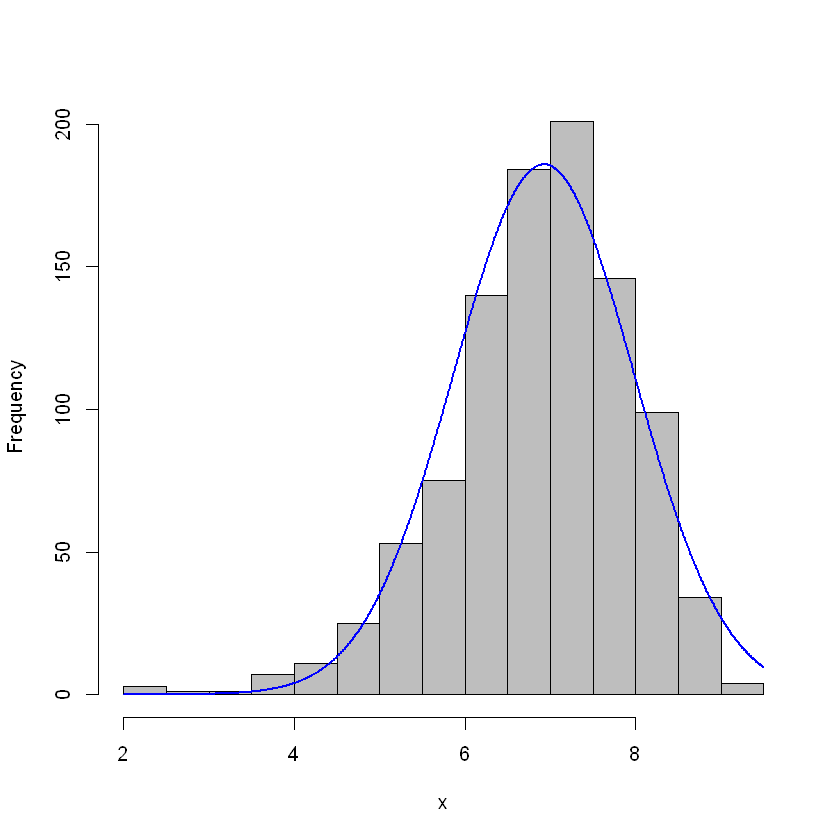

In [9]:
plotNormalHistogram(Netflix1$imdb_score)

In [10]:
Netflix1$imdb_scoreSQ <- Netflix1$imdb_score * Netflix1$imdb_score

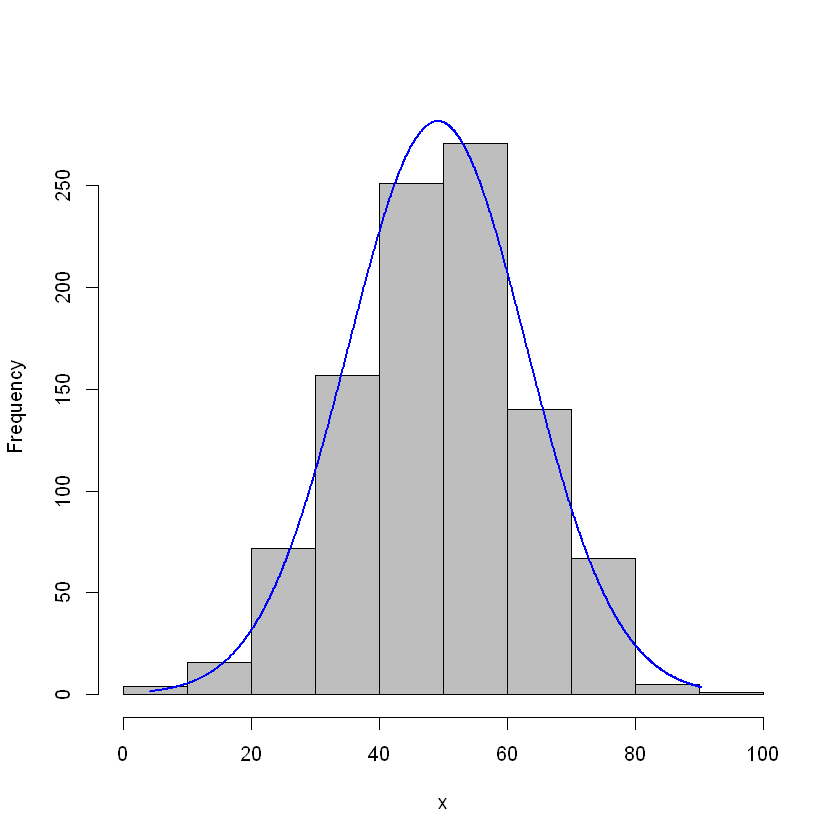

In [11]:
plotNormalHistogram(Netflix1$imdb_scoreSQ)

# Test for Homogeneity of Variance

In [12]:
bartlett.test(imdb_scoreSQ ~ age_certification, data=Netflix1)


	Bartlett test of homogeneity of variances

data:  imdb_scoreSQ by age_certification
Bartlett's K-squared = 2.5777, df = 2, p-value = 0.2756


In [13]:
str(Netflix)

'data.frame':	5850 obs. of  34 variables:
 $ X                   : int  0 1 2 3 4 5 6 7 8 9 ...
 $ id                  : chr  "ts300399" "tm84618" "tm154986" "tm127384" ...
 $ title               : chr  "Five Came Back: The Reference Films" "Taxi Driver" "Deliverance" "Monty Python and the Holy Grail" ...
 $ type                : chr  "SHOW" "MOVIE" "MOVIE" "MOVIE" ...
 $ description         : chr  "This collection includes 12 World War II-era propaganda films â\200” many of which are graphic and offensive â\"| __truncated__ "A mentally unstable Vietnam War veteran works as a night-time taxi driver in New York City where the perceived "| __truncated__ "Intent on seeing the Cahulawassee River before it's turned into one huge lake, outdoor fanatic Lewis Medlock ta"| __truncated__ "King Arthur, accompanied by his squire, recruits his Knights of the Round Table, including Sir Bedevere the Wis"| __truncated__ ...
 $ release_year        : int  1945 1976 1972 1975 1967 1969 1979 1971 1967 198

In [14]:
# The p-value is > .05 so we have met this assumption

In [15]:
# Run Analysis 

In [16]:
Netflix1ANOVA <- aov(Netflix1$imdb_score ~ Netflix1$age_certification)

In [17]:
summary(Netflix1ANOVA)

                            Df Sum Sq Mean Sq F value   Pr(>F)    
Netflix1$age_certification   2   47.2   23.60   22.06 4.25e-10 ***
Residuals                  981 1049.4    1.07                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

In [18]:
# The test shows a significant differencce in ratings between age certifications 

# Computing Post Hocs 

In [19]:
pairwise.t.test(Netflix1$imdb_score, Netflix1$age_certification, p.adjust="none")


	Pairwise comparisons using t tests with pooled SD 

data:  Netflix1$imdb_score and Netflix1$age_certification 

      TV-G    TV-MA  
TV-MA 3.6e-08 -      
TV-Y  0.18    4.0e-05

P value adjustment method: none 

There is a significant difference for score between G rating and MA rating, and between Y and MA rating. There is not a significant difference between G and Y ratings. 

# Determine Means and Draw Conclusions

In [20]:
Means <- Netflix1 %>% group_by(age_certification) %>% summarize(Mean = mean(imdb_score))

In [21]:
Means

age_certification,Mean
<chr>,<dbl>
TV-G,6.321622
TV-MA,7.018613
TV-Y,6.539773


**Looking at the means we can see that ratings with TV-MA recieve higher IMDB scores on avgerage than shows with a rating of TV-G and TV-Y.**

# Linear Regression 

In [22]:
install.packages("car")
install.packages("caret")
install.packages("gvlma")
install.packages("predictmeans")
install.packages("e1071")
install.packages("lmtest")
library("car")
library("caret")
library("gvlma")
library("predictmeans")
library("e1071")
library("lmtest")

Warning message:
"package 'car' is in use and will not be installed"
Installing package into 'C:/Users/Summe/OneDrive/Documents/R/win-library/4.1'
(as 'lib' is unspecified)



package 'caret' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Summe\AppData\Local\Temp\Rtmpeqk7NR\downloaded_packages


Installing package into 'C:/Users/Summe/OneDrive/Documents/R/win-library/4.1'
(as 'lib' is unspecified)



package 'gvlma' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Summe\AppData\Local\Temp\Rtmpeqk7NR\downloaded_packages


Installing package into 'C:/Users/Summe/OneDrive/Documents/R/win-library/4.1'
(as 'lib' is unspecified)



package 'predictmeans' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Summe\AppData\Local\Temp\Rtmpeqk7NR\downloaded_packages


Installing package into 'C:/Users/Summe/OneDrive/Documents/R/win-library/4.1'
(as 'lib' is unspecified)



package 'e1071' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'e1071'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\Summe\OneDrive\Documents\R\win-library\4.1\00LOCK\e1071\libs\x64\e1071.dll to C:\Users\Summe\OneDrive\Documents\R\win-library\4.1\e1071\libs\x64\e1071.dll: Permission denied"
Warning message:
"restored 'e1071'"



The downloaded binary packages are in
	C:\Users\Summe\AppData\Local\Temp\Rtmpeqk7NR\downloaded_packages


Installing package into 'C:/Users/Summe/OneDrive/Documents/R/win-library/4.1'
(as 'lib' is unspecified)



package 'lmtest' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'lmtest'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\Summe\OneDrive\Documents\R\win-library\4.1\00LOCK\lmtest\libs\x64\lmtest.dll to C:\Users\Summe\OneDrive\Documents\R\win-library\4.1\lmtest\libs\x64\lmtest.dll: Permission denied"
Warning message:
"restored 'lmtest'"



The downloaded binary packages are in
	C:\Users\Summe\AppData\Local\Temp\Rtmpeqk7NR\downloaded_packages


Warning message:
"package 'caret' was built under R version 4.1.3"
Loading required package: ggplot2

Warning message:
"package 'ggplot2' was built under R version 4.1.3"
Loading required package: lattice

Warning message:
"package 'predictmeans' was built under R version 4.1.3"
Loading required package: lme4

Warning message:
"package 'lme4' was built under R version 4.1.3"
Loading required package: Matrix

Loading required package: nlme


Attaching package: 'nlme'


The following object is masked from 'package:lme4':

    lmList


The following object is masked from 'package:dplyr':

    collapse


Loading required package: lmeInfo

Warning message:
"package 'lmeInfo' was built under R version 4.1.3"
Loading required package: parallel

Warning message:
"package 'e1071' was built under R version 4.1.3"
Warning message:
"package 'lmtest' was built under R version 4.1.3"
Loading required package: zoo


Attaching package: 'zoo'


The following objects are masked from 'package:base':

   

# Question 2 Does the TMDB score impact the IMDB score?

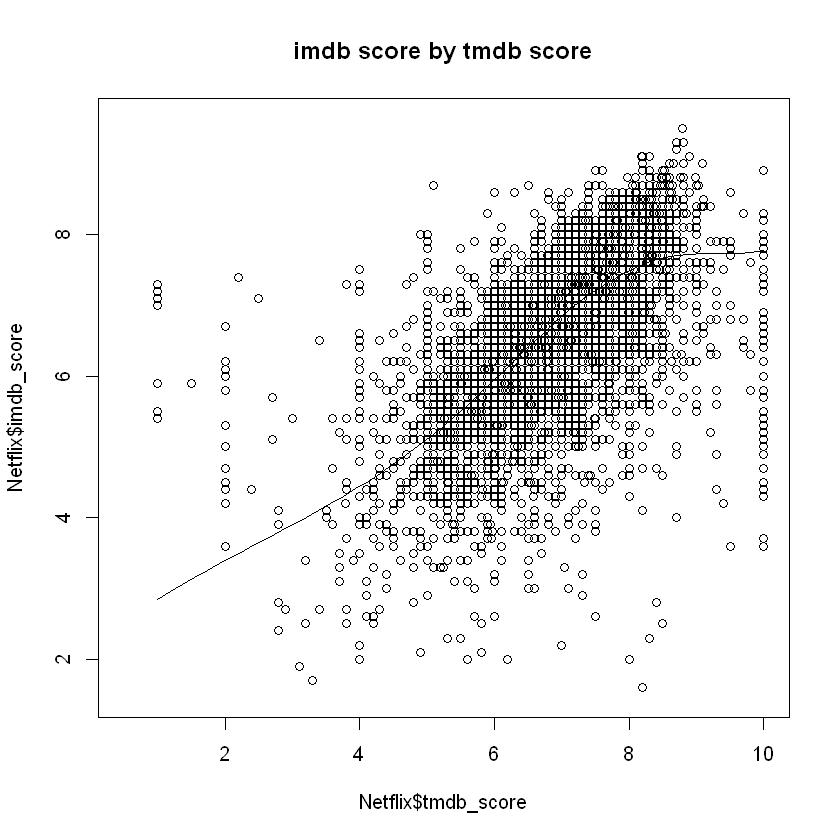

In [23]:
scatter.smooth(x=Netflix$tmdb_score, y=Netflix$imdb_score, main="imdb score by tmdb score")

In [24]:
lmMod <- lm(imdb_score~tmdb_score, data=Netflix)

In [25]:
lmMod


Call:
lm(formula = imdb_score ~ tmdb_score, data = Netflix)

Coefficients:
(Intercept)   tmdb_score  
      2.599        0.574  


# Test for Linearity Passed

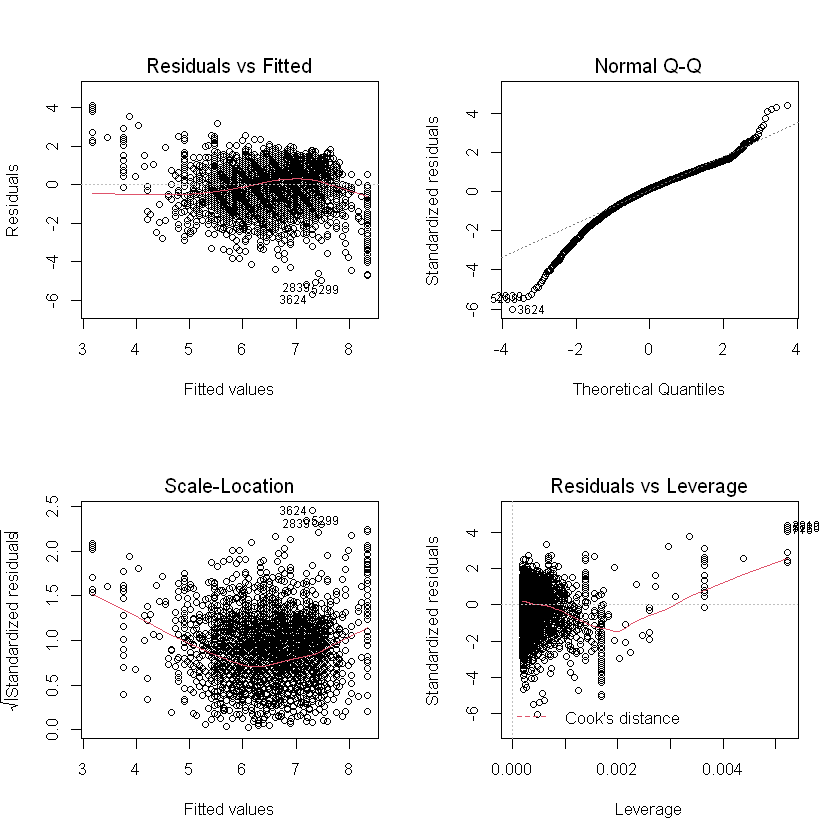

In [26]:
par(mfrow=c(2,2))
plot(lmMod)

In [27]:
lmtest::bptest(lmMod)


	studentized Breusch-Pagan test

data:  lmMod
BP = 3.3555, df = 1, p-value = 0.06698


# Test for Homoscedasticity and for Homogeneity of Variance passed 

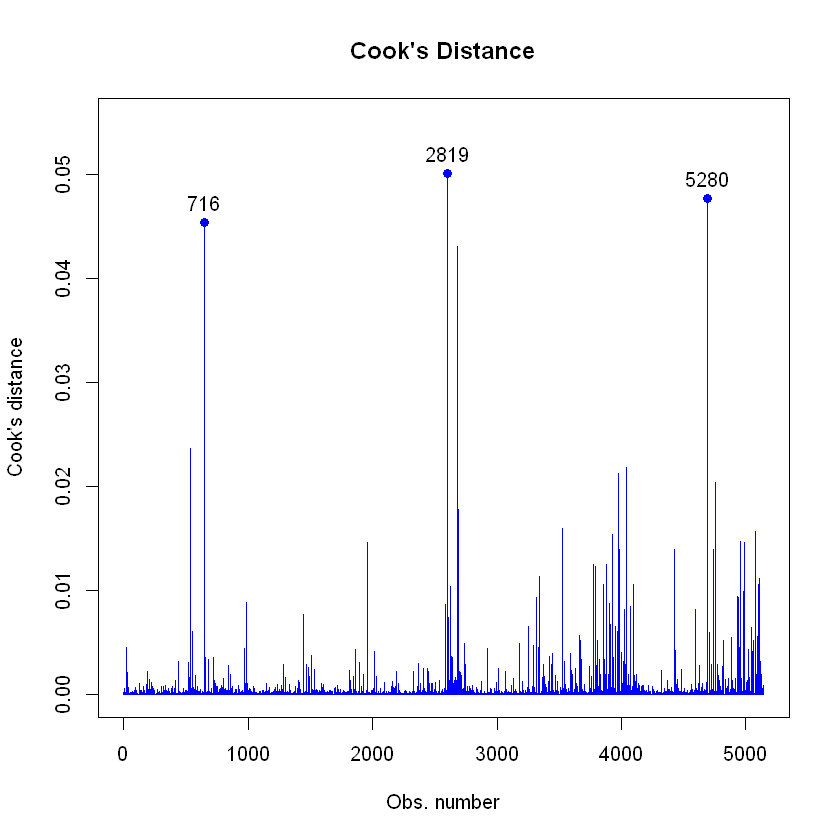

In [28]:
 CookD(lmMod, group=NULL, plot=TRUE, idn=3, newwd=FALSE)

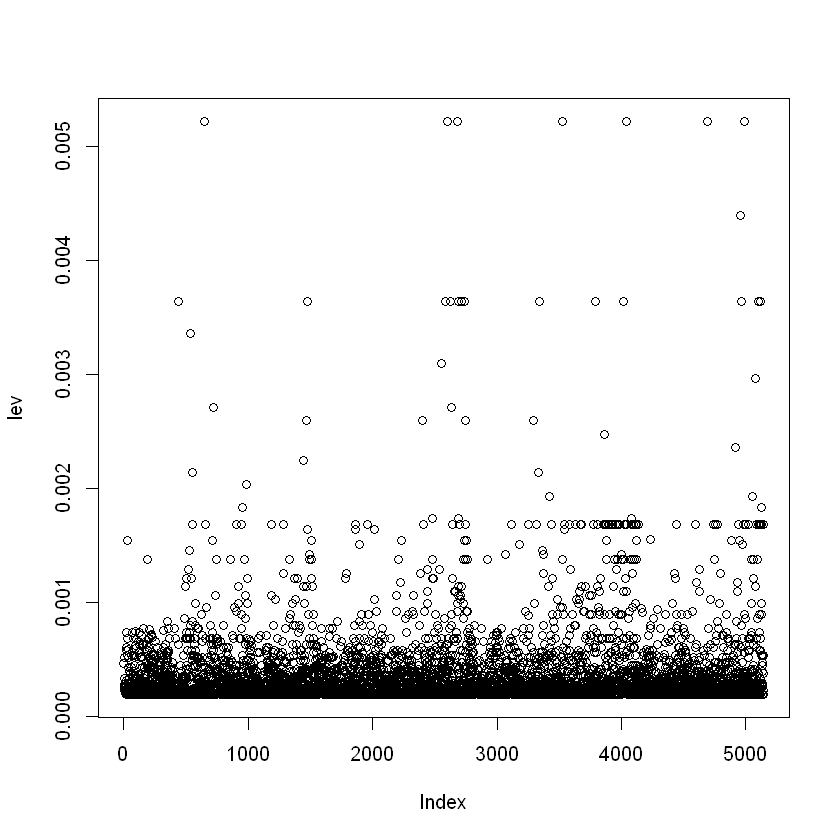

In [29]:
lev = hat(model.matrix(lmMod))
plot(lev)

In [30]:
Netflix[lev>.2,]

Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
"number of rows of result is not a multiple of vector length (arg 2)"
Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
"number of rows of result is not a multiple of vector length (arg 2)"
Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
"number of rows of result is not a multiple of vector length (arg 2)"
Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
"number of rows of result is not a multiple of vector length (arg 2)"


X,id,title,type,description,release_year,age_certification,runtime,production_countries,seasons,...,thriller,crime,comedy,documentation,fantasy,scifi,romance,horror,history,music
<int>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<chr>,<dbl>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>


In [31]:
# No outliers in X space

In [32]:
car::outlierTest(lmMod)

      rstudent unadjusted p-value Bonferroni p
3624 -6.052003         1.5319e-09   7.8815e-06
5299 -5.502400         3.9280e-08   2.0210e-04
2839 -5.366492         8.3804e-08   4.3117e-04
4567 -5.275950         1.3749e-07   7.0737e-04
4427 -5.024126         5.2285e-07   2.6901e-03
5353 -4.917611         9.0334e-07   4.6477e-03
4335 -4.895221         1.0120e-06   5.2066e-03
4997 -4.717479         2.4511e-06   1.2611e-02
2945 -4.677718         2.9752e-06   1.5307e-02
5806 -4.557715         5.2911e-06   2.7223e-02

In [33]:
# No outliers in Y space

In [34]:
summary(influence.measures(lmMod))

Potentially influential observations of
	 lm(formula = imdb_score ~ tmdb_score, data = Netflix) :

     dfb.1_ dfb.tmd_ dffit   cov.r   cook.d hat    
20   -0.09   0.08    -0.10_*  1.00_*  0.00   0.00  
30    0.01  -0.01     0.01    1.00_*  0.00   0.00_*
33    0.06  -0.05     0.06_*  1.00_*  0.00   0.00  
201   0.07  -0.06     0.07_*  1.00    0.00   0.00_*
349   0.00  -0.01    -0.04    1.00_*  0.00   0.00  
439   0.02  -0.01     0.04    1.00_*  0.00   0.00  
460   0.08  -0.08     0.08_*  1.00_*  0.00   0.00_*
517   0.00   0.00     0.00    1.00_*  0.00   0.00  
518   0.01  -0.01     0.01    1.00_*  0.00   0.00  
526  -0.01   0.01    -0.01    1.00_*  0.00   0.00  
537  -0.02   0.02    -0.02    1.00_*  0.00   0.00_*
559  -0.08   0.07    -0.08_*  1.00    0.00   0.00_*
567  -0.06   0.05    -0.06    1.00    0.00   0.00_*
585   0.22  -0.21     0.22_*  1.00_*  0.02   0.00_*
589   0.00  -0.01    -0.03    1.00_*  0.00   0.00  
591  -0.03   0.02    -0.03    1.00_*  0.00   0.00_*
595   0.10  -0.10

In [35]:
# No oultiers in X an Y space

In [36]:
summary(lmMod)


Call:
lm(formula = imdb_score ~ tmdb_score, data = Netflix)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.7060 -0.4823  0.1254  0.6124  4.1269 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.59911    0.07968   32.62   <2e-16 ***
tmdb_score   0.57401    0.01152   49.85   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.9463 on 5143 degrees of freedom
  (705 observations deleted due to missingness)
Multiple R-squared:  0.3258,	Adjusted R-squared:  0.3256 
F-statistic:  2485 on 1 and 5143 DF,  p-value: < 2.2e-16


In [37]:
# There is significant ecidence to prove there is a linear relationship between the Tmdb and Imdb score. 

# Predictions

If the Tmbd score is 6 we can predict that the Imdb score will be 6.04

In [38]:
(y = 0.574(6) + 2.59911) (Y= 6.0431)

ERROR: Error in eval(expr, envir, enclos): attempt to apply non-function


# Question 3: Is there a difference in runtime among the different genres?

# Question 4: Average ratings amoung genres?

# Question 5: How does 'year realeased' relate to 'rating'? 

In [ ]:
str(Netflix)

In [ ]:
Netflix$release_year <- as.integer(Netflix$release_year)

In [ ]:
scatter.smooth(x=Netflix$release_year, y=Netflix$imdb_score, main="release year by imdb score")

In [ ]:
Netflix %>% 
    select(imdb_score) %>% 
    drop_na(imdb_score) %>%
    filter(!complete.cases(.)) %>%
    View()

In [ ]:
Netflix$imdb_score(is.na(Netflix$imdb_score) <- mean(Netflix$imdb_score, na.rm = TRUE)

In [ ]:
Means2 <- Netflix %>% group_by(release_year) %>% summarize(Mean = mean(imdb_score))

In [ ]:
Means2

# Second Data Set

In [ ]:
Netflix2 = read.csv("C:/Users/Summe/OneDrive/Desktop/NetflixOriginals.csv")

In [ ]:
Netflix2

In [ ]:
unique(Netflix2$Genre)

In [ ]:
GenreMean <- Netflix2 %>% group_by(Genre) %>% summarize(Mean = mean(IMDB.Score))

In [ ]:
GenreMean

Lowest Score: 4.4 = Superhero-Comedy 
Highest Score: 8.2 = Animation/Christmas/Comedy/Adventure

# How have movie times changed through the decades? 

In [39]:
unique( Netflix$release_year)

[1] 1945 1976 1972 1975 1967 1969 1979 1971 1980 1961 1966 1954 1958 1977 1963
[16] 1956 1960 1973 1974 1959 1978 1989 1990 1987 1984 1983 1982 1986 1981 1988
[31] 1985 2000 1996 1997 1995 1994 1999 1998 1993 1992 1991 2008 2002 2010 2005
[46] 2007 2004 2006 2009 2003 2001 2011 2012 2013 2014 2015 2016 2018 2017 2019
[61] 2020 2022 2021

In [40]:
Netflix90 <- na.omit(Netflix %>% filter(release_year %in% c('1990','1991','1992','1993','1994','1995','1996','1997','1998','1999')))

In [41]:
Netflix00 <- na.omit(Netflix %>% filter(release_year %in% c('2000','2001','2002','2003','2004','2005','2006','2007','2008','2009')))

In [42]:
Netflix10 <- na.omit(Netflix %>% filter(release_year %in% c('2010','2011','2012','2013','2014','2015','2016','2017','2018','2019')))

In [43]:
unique( Netflix10$release_year)

[1] 2010 2011 2012 2013 2014 2015 2016 2018 2017 2019

In [44]:
unique( Netflix00$release_year)

[1] 2000 2008 2002 2005 2006 2009 2003 2007 2004 2001

In [45]:
unique( Netflix90$release_year)

[1] 1997 1999 1998 1995 1993 1994 1992 1996

In [46]:
MeansRunTime <- Netflix90 %>% group_by(release_year) %>% summarize(Mean = mean(runtime))

In [47]:
MeansRunTime

release_year,Mean
<int>,<dbl>
1992,28.00
1993,22.00
1994,28.75
1995,23.00
1996,23.00
1997,33.00
1998,27.40
1999,17.00


In [48]:
MeansRunTime <- Netflix90 %>% summarize(Mean = mean(runtime))

In [49]:
MeansRunTime

Mean
<dbl>
25.38095


In [50]:
MeansRunTime <- Netflix00 %>% summarize(Mean = mean(runtime))

In [51]:
MeansRunTime

Mean
<dbl>
33.2


In [52]:
MeansRunTime <- Netflix10 %>% summarize(Mean = mean(runtime))

In [53]:
MeansRunTime

Mean
<dbl>
38.78705


# Is there a difference in runtime among the three seperate data frames of the 90's, 00's and 10's?

In [ ]:
NetflixDecades <- rbind(Netflix00, Netflix)

In [ ]:
list1 <- list(Netflix00=Netflix00, Netflix90=Netflix90, Netflix01=Netflix10)

res <- sapply(list1, function(x) {
  dat <- cbind(release_year, x)
  sapply(dat[-(1:3)], function(y) {
    z <- aov(y ~ Group*Time + Error(Name/(Group*Time)), data=dat)
    sz <- summary(z)
    p <- sz$`Error: Name:Group:Time`[[1]][1, 5]
    p
  })
})

In [ ]:
Netflix90